In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib.patches as mpatches

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, 'code')
from help_funcs import *

In [2]:
import matplotlib

matplotlib.rcParams.update({'font.size': 18})

In [3]:
pvcolor = (0.0, 0.4039, 0.7059)
sstcolor = (0.898,0.6314,0.0039)

In [4]:
def periodic_distance(p1, p2, L=1.0):
    """
    Calculates the periodic distance between two points on a 1x1 2-dimensional plane.

    Parameters
    ----------
    p1 : numpy array
        The first point, with shape (2,).
    p2 : numpy array
        The second point, with shape (2,).
    L : float
        The length of the periodic boundary, default value is 1.0.

    Returns
    -------
    distance : float
        The periodic distance between two points.
    """
    delta = np.abs(p1 - p2)
    delta = np.where(delta > L/2, L - delta, delta)
    return np.sqrt(np.sum(delta**2))


In [5]:
def plot_raster(all_spikes, all_positions, tmin = 1000, tmax = 2000):
    
    blue_patch = mpatches.Patch(color='blue', label='PV ChR2 stim')
    black_patch = mpatches.Patch(color='black', label='visual stim')


    order = 1000

    # test out plotting code   
    fig, axes = plt.subplots(3,1,figsize = (12,15),gridspec_kw = {'height_ratios':[4,1,1]})

    ax0 = axes[0]
#     ax0.set_title('contrast=0, local PV stim = 0.1')
    ax0.set_ylabel('Exc',fontsize=15)
    ax0.set_xticks([])
    ax0.set_ylim([0,8*order])
    ax0.set_xlim([tmin,tmax])
    
    center = np.array([0.5,0.5])
    exc_sorted = []
    for i in range(8000):
        dist = periodic_distance(center,all_positions[i])
        exc_sorted.append([dist, i])
    exc_sorted.sort()
    
    for i in range(8*order):
        ni = exc_sorted[i][1]
        spikeTimes = all_spikes[:8*order][ni][all_spikes[:8*order][ni]<tmax]
        spikeTimes = spikeTimes[spikeTimes>tmin]
        index = i*np.ones(len(spikeTimes))
        ax0.plot(spikeTimes, index, linestyle='',marker='o', color='black',markersize=0.5)
#     ax0.add_patch(plt.Polygon((np.array([[1900,-200],[tmin,0],[tmin+100,-200]])),clip_on=False,color='black'))
#     ax0.add_patch(plt.Polygon((np.array([[2400,-200],[tmin+500,0],[tmin+600,-200]])),clip_on=False,color='black'))
#     ax0.add_patch(plt.Polygon((np.array([[2900,-200],[tmin+1000,0],[3100,-200]])),clip_on=False,color='black'))
#     ax0.add_patch(plt.Polygon((np.array([[3400,-200],[3500,0],[3600,-200]])),clip_on=False,color='black'))
#     ax0.add_patch(plt.Polygon((np.array([[3900,-200],[4000,0],[4100,-200]])),clip_on=False,color='black'))

    ax1 = axes[1]
    ax1.set_xlim([tmin,tmax])
    ax1.set_ylim([0,order])
    ax1.set_ylabel('PV',fontsize=15)
    ax1.set_xticks([])
    
    pv_sorted = []
    for i in range(8000,9000):
        dist = periodic_distance(center,all_positions[i])
        pv_sorted.append([dist, i])
    pv_sorted.sort()
    
    for i in range(1000):
        ni = pv_sorted[i][1]
        spikeTimes = all_spikes[ni][all_spikes[ni]<tmax]
#         spikeTimes = all_spikes[8*order:9*order][ni-8000][all_spikes[8*order:9*order][ni-8000]<tmax]
        spikeTimes = spikeTimes[spikeTimes>tmin]
        index = i*np.ones(len(spikeTimes))
        ax1.plot(spikeTimes, index, linestyle='',marker='o', color='black',markersize=0.5)
#     ax1.add_patch(plt.Polygon((np.array([[2400,-200],[2500,0],[2600,-200]])),clip_on=False,color='blue'))
#     ax1.add_patch(plt.Polygon((np.array([[3400,-200],[3500,0],[3600,-200]])),clip_on=False,color='blue'))
#     ax1.legend(handles=[blue_patch,black_patch], loc='center left', bbox_to_anchor=(1, 1.7), fontsize=18)

    ax2 = axes[2]
    ax2.set_ylim([0,order])
    ax2.set_xlim([tmin,tmax])
    ax2.set_ylabel('SST',fontsize=15)
    ax2.set_xlabel('time, t (ms)',fontsize=20)
    sst_sorted = []
    for i in range(9000,10000):
        dist = periodic_distance(center,all_positions[i])
        sst_sorted.append([dist, i])
#         print(i)
    sst_sorted.sort()
    
    for i in range(1000):
        ni = sst_sorted[i][1]
#         print(ni)
        spikeTimes = all_spikes[ni][all_spikes[ni]<tmax]
        spikeTimes = spikeTimes[spikeTimes>tmin]
        index = i*np.ones(len(spikeTimes))
        ax2.plot(spikeTimes, index, linestyle='',marker='o', color='black',markersize=0.5)

    plt.show()

In [6]:
def get_stmap(all_spikes, all_positions, simtime=800, nrepeats = 10):
    
    control_times = [ti*simtime for ti in range(5)]
    stim_times = [ti*simtime+simtime for ti in range(5)]
    
    tbinsize = 1
    tlen = int(600/tbinsize)
    
    exc_ctrl, exc_stim = np.zeros([1000,tlen]), np.zeros([1000,tlen])
    pv_ctrl, pv_stim = np.zeros([1000,tlen]), np.zeros([1000,tlen])
    sst_ctrl, sst_stim = np.zeros([1000,tlen]), np.zeros([1000,tlen])
    
    
    blue_patch = mpatches.Patch(color='blue', label='PV ChR2 stim')
    black_patch = mpatches.Patch(color='black', label='visual stim')

    order = 1000

    center = np.array([0.5,0.5])
    exc_sorted = []
    for i in range(8000):
        dist = periodic_distance(center,all_positions[i])
        exc_sorted.append([dist, i])
    exc_sorted.sort()
    
    xbinsize = 8
    
    for tmin in control_times:
        tmax = tmin + tlen
        for i in range(8000):
            ni = exc_sorted[i][1]
            spikeTimes = all_spikes[:8*order][ni][all_spikes[:8*order][ni]<tmax]
            spikeTimes = spikeTimes[spikeTimes>tmin]
            stimes = spikeTimes - tmin
            
            for st in stimes:
                xbin = int(np.floor( i / xbinsize))
                tbin = int(np.floor( st / tbinsize))
                exc_ctrl[xbin,tbin] += 1
                
    for tmin in stim_times:
        tmax = tmin + tlen
        for i in range(8000):
            ni = exc_sorted[i][1]
            spikeTimes = all_spikes[:8*order][ni][all_spikes[:8*order][ni]<tmax]
            spikeTimes = spikeTimes[spikeTimes>tmin]
            stimes = spikeTimes - tmin
            
            for st in stimes:
                xbin = int(np.floor( i / xbinsize))
                tbin = int(np.floor( st / tbinsize))
                exc_stim[xbin,tbin] += 1
            
    
    pv_sorted = []
    for i in range(8000,9000):
        dist = periodic_distance(center,all_positions[i])
        pv_sorted.append([dist, i])
    pv_sorted.sort()
    
    xbinsize = 1
    
    for tmin in control_times:
        tmax = tmin + tlen
        for i in range(1000):
            ni = pv_sorted[i][1]
            spikeTimes = all_spikes[8*order:9*order][ni-8000][all_spikes[8*order:9*order][ni-8000]<tmax]
            spikeTimes = spikeTimes[spikeTimes>tmin]
            stimes = spikeTimes - tmin
            
            for st in stimes:
                xbin = int(np.floor( i / xbinsize))
                tbin = int(np.floor( st / tbinsize))
                pv_ctrl[xbin,tbin] += 1
                
    for tmin in stim_times:
        tmax = tmin + tlen
        for i in range(1000):
            ni = pv_sorted[i][1]
            spikeTimes = all_spikes[8*order:9*order][ni-8000][all_spikes[8*order:9*order][ni-8000]<tmax]
            spikeTimes = spikeTimes[spikeTimes>tmin]
            stimes = spikeTimes - tmin
            
            for st in stimes:
                xbin = int(np.floor( i / xbinsize))
                tbin = int(np.floor( st / tbinsize))
                pv_stim[xbin,tbin] += 1

    sst_sorted = []
    for i in range(9000):
        dist = periodic_distance(center,all_positions[i])
        sst_sorted.append([dist, i])
    sst_sorted.sort()
    
        
    for tmin in control_times:
        tmax = tmin + tlen
        for i in range(1000):
            ni = sst_sorted[i][1]
            spikeTimes = all_spikes[9*order:][ni-9000][all_spikes[9*order:][ni-9000]<tmax]
            spikeTimes = spikeTimes[spikeTimes>tmin]
            stimes = spikeTimes - tmin
            
            for st in stimes:
                xbin = int(np.floor( i / xbinsize))
                tbin = int(np.floor( st / tbinsize))
                sst_ctrl[xbin,tbin] += 1
                
    for tmin in stim_times:
        tmax = tmin + tlen
        for i in range(1000):
            ni = sst_sorted[i][1]
            spikeTimes = all_spikes[9*order:][ni-9000][all_spikes[9*order:][ni-9000]<tmax]
            spikeTimes = spikeTimes[spikeTimes>tmin]
            stimes = spikeTimes - tmin
            
            for st in stimes:
                xbin = int(np.floor( i / xbinsize))
                tbin = int(np.floor( st / tbinsize))
                sst_stim[xbin,tbin] += 1
                
    return exc_ctrl, exc_stim, pv_ctrl, pv_stim, sst_ctrl, sst_stim

In [31]:
# def bin_fr(spikes, tmin, tmax, dt):
#     alls = [t for event in spikes for t in event]
#     hist, bins = np.histogram(alls, bins=np.arange(tmin, tmax + dt, dt))
#     return hist, bins

def bin_fr(spikes, tmin, tmax, dt):
    alls = [t for event in spikes for t in event]
    hist, bins = np.histogram(alls, bins=np.arange(tmin, tmax + dt, dt))
    rates = hist / dt / len(spikes) *1000
    return rates, bins[:-1]

def get_averages(spikes, tlen = 200, delay = 200, simtime = 800, repeats = 4, dt = 10):
    
    ctrl_times = []
    stim_times = []
    for repeat in range(repeats):
        ctrl_times.append(delay + simtime*repeat*2)
        stim_times.append(delay + simtime*(2*repeat+1))
        print(delay + simtime*repeat*2, delay + simtime*(2*repeat+1))
    hists_ctrl = []
    for tim in ctrl_times:
        hist,bins = bin_fr(spikes, tim, tim+tlen, dt)
        hists_ctrl.append(hist)
    hists_stim = []
    for tim in stim_times:
        hist,bins = bin_fr(spikes, tim, tim+tlen, dt)
        hists_stim.append(hist)
        
    return bins, np.mean(hists_ctrl, axis=0), np.mean(hists_stim, axis=0)

def get_local_spikes(spikes, positions, radius = 0.3, center = [0.5, 0.5]):
    center = np.array(center)
    selected=[]
    N= len(spikes)
    assert len(positions)==N
    for i in range(N):
        dist = periodic_distance(center,positions[i])
        if dist < radius:
            selected.append(spikes[i])
    return selected


def get_local_averages(spikes, positions, radius = 0.3, center = [0.5, 0.5]):
    selected = get_local_spikes(spikes,positions, radius=radius, center=center)
    return get_averages(selected)


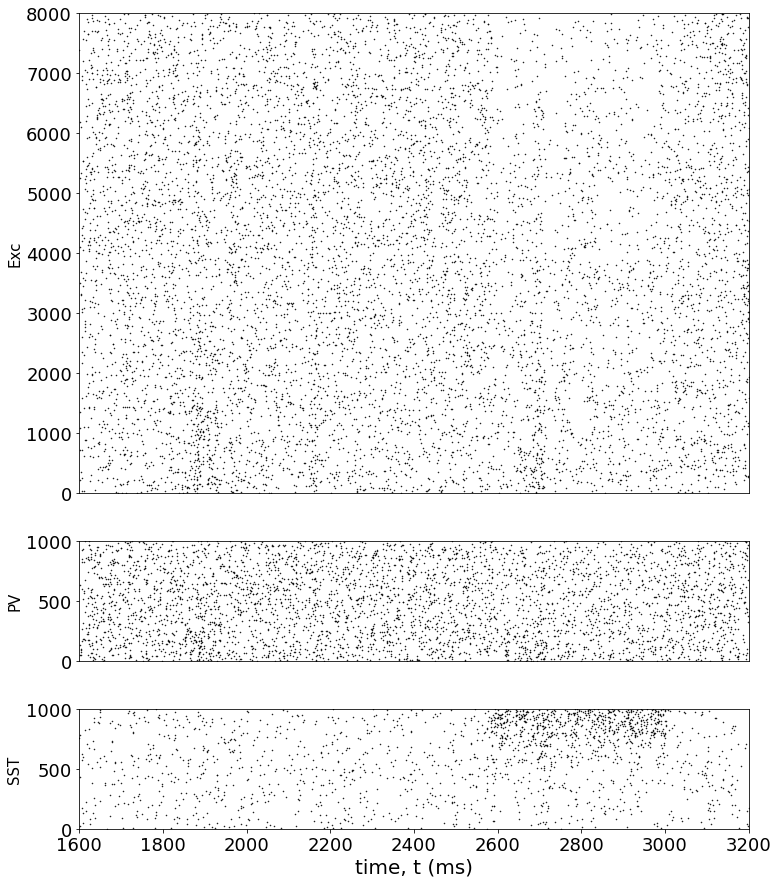

In [28]:
# simname = 'lb8ns1.0e0.2'
simname = 'lb8_a0.02_pf0.2'
simname = 'v3_19_n1.0_w1.0'
simname = 'v3_lb8_p0.3'
simname = 'v4d_a0.02_pf0.3'
# simname = 'v3_11_ee0.02'
stim = 'SOM'
cont = 0.33
with open(f'data/{simname}/results_1/%s_%s_spikes.pickle'%(stim, cont),'rb') as f:
    all_spikes = pickle.load(f)
with open(f'data/{simname}/results_1/%s_%s_positions.pickle'%(stim, cont),'rb') as f:
    all_positions = pickle.load(f)
plot_raster(all_spikes, all_positions, tmin = 1600, tmax = 3200)

Text(0, 0.5, 'SST neurons in\n laser area')

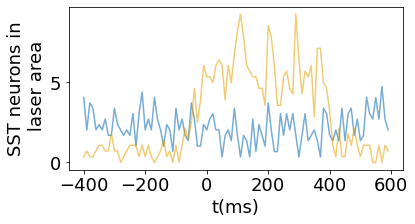

In [19]:
# simname = 'v3_18'
stim = 'SOM'
tmin = 600
tmax = tmin + 1000
dist_pos = [0.,0.]
fig, ax = plt.subplots(figsize = (6,3))
for cont in [0.18]:
    
    with open(f'data/{simname}/results_1/%s_%s_spikes.pickle'%(stim, cont),'rb') as f:
        all_spikes = pickle.load(f)
    with open(f'data/{simname}/results_1/%s_%s_positions.pickle'%(stim, cont),'rb') as f:
        all_positions = pickle.load(f)
        
    
    erates, bins = bin_fr(get_local_spikes(all_spikes[:8000], all_positions[:8000], center= dist_pos), tmin,tmax, 10)
    pvrates, bins = bin_fr(get_local_spikes(all_spikes[8000:9000], all_positions[8000:9000], center= dist_pos), tmin,tmax, 10)
    sstrates, bins = bin_fr(get_local_spikes(all_spikes[9000:], all_positions[9000:], center= dist_pos), tmin,tmax, 10)

#     axes[0].plot(bins-tmin-200, erates, alpha = cont*3, c  = 'black')
    ax.plot(bins-tmin-400, pvrates, alpha = cont*3, c  = pvcolor)
    ax.plot(bins-tmin-400, sstrates, alpha = cont*3, c  = sstcolor)
ax.set_xlabel("t(ms)")
# ax.set_ylim(-2,24)
ax.set_ylabel('SST neurons in\n laser area')

200 1000
1800 2600
3400 4200
5000 5800
200 1000
1800 2600
3400 4200
5000 5800
200 1000
1800 2600
3400 4200
5000 5800
0.02 16.04692052181336
200 1000
1800 2600
3400 4200
5000 5800
200 1000
1800 2600
3400 4200
5000 5800
200 1000
1800 2600
3400 4200
5000 5800
0.05 16.36330002412366
200 1000
1800 2600
3400 4200
5000 5800
200 1000
1800 2600
3400 4200
5000 5800
200 1000
1800 2600
3400 4200
5000 5800
0.1 16.97926524893763
200 1000
1800 2600
3400 4200
5000 5800
200 1000
1800 2600
3400 4200
5000 5800
200 1000
1800 2600
3400 4200
5000 5800
0.18 17.883641605893594
200 1000
1800 2600
3400 4200
5000 5800
200 1000
1800 2600
3400 4200
5000 5800
200 1000
1800 2600
3400 4200
5000 5800
0.33 18.431155940915588
200 1000
1800 2600
3400 4200
5000 5800
200 1000
1800 2600
3400 4200
5000 5800
200 1000
1800 2600
3400 4200
5000 5800
0.02 16.958226632522408
200 1000
1800 2600
3400 4200
5000 5800
200 1000
1800 2600
3400 4200
5000 5800
200 1000
1800 2600
3400 4200
5000 5800
0.05 17.849967061923586
200 1000
1800 260

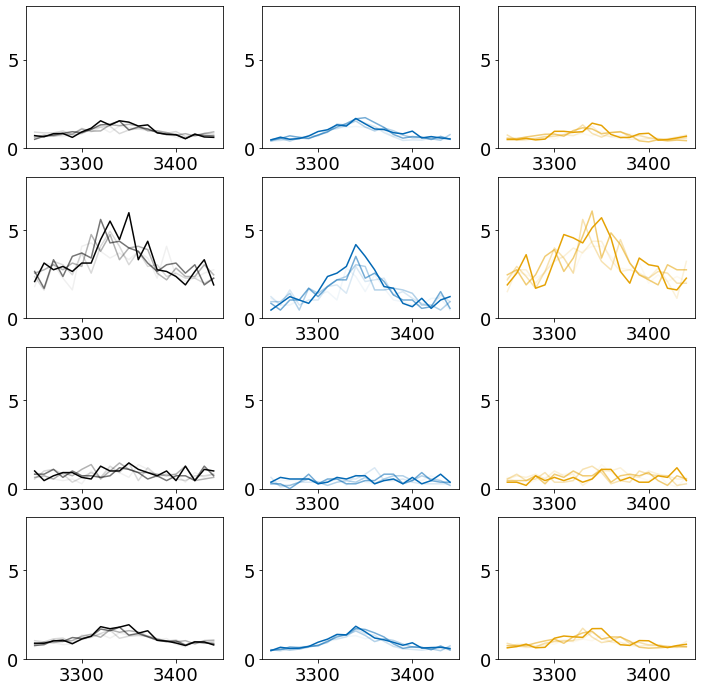

In [33]:
# tmin = 800*2+50
# # tmin = 200
# tlen = 150+200
# tmax = tmin + tlen
# tbin = 10
dist_pos = [0.5,0.5]
fig, axes = plt.subplots(4,3,figsize = (12,12))

# ax.set_xlabel("t(ms)")

# simname = 'lb8_a0.02_pf0.6'
stim = 'PV'

for cont in [0.02,0.05,0.1,0.18,0.33]:
# for cont in [0.18]:
    with open(f'data/{simname}/results_1/%s_%s_spikes.pickle'%(stim, cont),'rb') as f:
        all_spikes = pickle.load(f)
    with open(f'data/{simname}/results_1/%s_%s_positions.pickle'%(stim, cont),'rb') as f:
        all_positions = pickle.load(f)
        
    
    bins, erates_ctrl, erates = get_local_averages(all_spikes[:8000], all_positions[:8000], center= dist_pos)
    bins, pvrates_ctrl, pvrates = get_local_averages(all_spikes[8000:9000], all_positions[8000:9000], center= dist_pos)
    bins, sstrates_ctrl, sstrates = get_local_averages(all_spikes[9000:], all_positions[9000:], center= dist_pos)

    poprates_ctrl = 0.8*erates_ctrl + 0.1*pvrates_ctrl + 0.1*sstrates_ctrl
    axes[3,0].plot(bins-tmin-100, poprates_ctrl, alpha = cont*3, c  = 'black')
    axes[0,0].plot(bins-tmin-100, erates_ctrl, alpha = cont*3, c  = 'black')
    axes[1,0].plot(bins-tmin-100, pvrates_ctrl, alpha = cont*3, c  = 'black')
    axes[2,0].plot(bins-tmin-100, sstrates_ctrl, alpha = cont*3, c  = 'black')
                                                            
                                                            
    poprates = 0.8*erates + 0.1*pvrates + 0.1*sstrates
    axes[3,1].plot(bins-tmin-100, poprates, alpha = cont*3, c  = pvcolor)
    axes[0,1].plot(bins-tmin-100, erates, alpha = cont*3, c  = pvcolor)
    axes[1,1].plot(bins-tmin-100, pvrates, alpha = cont*3, c  = pvcolor)
    axes[2,1].plot(bins-tmin-100, sstrates, alpha = cont*3, c  = pvcolor)
    print(cont, np.sum(poprates))
# ax.set_xlabel("t(ms)")

stim = 'SOM'
ax=axes[2]
# tmin = tmin + 800
# tmax = tmin + tlen
for cont in [0.02,0.05,0.1,0.18,0.33]:
# for cont in [0.18]:
    with open(f'data/{simname}/results_1/%s_%s_spikes.pickle'%(stim, cont),'rb') as f:
        all_spikes = pickle.load(f)
    with open(f'data/{simname}/results_1/%s_%s_positions.pickle'%(stim, cont),'rb') as f:
        all_positions = pickle.load(f)
        
    
    bins, erates_ctrl, erates = get_local_averages(all_spikes[:8000], all_positions[:8000], center= dist_pos)
    bins, pvrates_ctrl, pvrates = get_local_averages(all_spikes[8000:9000], all_positions[8000:9000], center= dist_pos)
    bins, sstrates_ctrl, sstrates = get_local_averages(all_spikes[9000:], all_positions[9000:], center= dist_pos)

    poprates = 0.8*erates + 0.1*pvrates + 0.1*sstrates
    axes[3,2].plot(bins-tmin-100, poprates, alpha = cont*3, c  = sstcolor)
    
    axes[0,2].plot(bins-tmin-100, erates, alpha = cont*3, c  = sstcolor)
    axes[1,2].plot(bins-tmin-100, pvrates, alpha = cont*3, c  = sstcolor)
    axes[2,2].plot(bins-tmin-100, sstrates, alpha = cont*3, c  = sstcolor)
    
    print(cont, np.sum(poprates))
# ax.set_xlabel("t(ms)")
for row in axes:
    for ax in row:
        ax.set_ylim(0,8)

# ax.set_ylim(-2,15)
# ax.set_ylabel('Exc neurons in\n visual area')

0.02 35.391963109354414
0.05 36.56114884299208
0.1 35.370321401399174
0.18 38.38782033439106
0.33 37.404270815936464
0.02 26.31810295236505
0.05 28.595469390784764
0.1 28.750440720740784
0.18 28.00629534784465
0.33 29.251331440553734
0.02 29.951822264283994
0.05 31.195211453172263
0.1 29.70798771548925
0.18 31.781509213383067
0.33 32.12053944218672


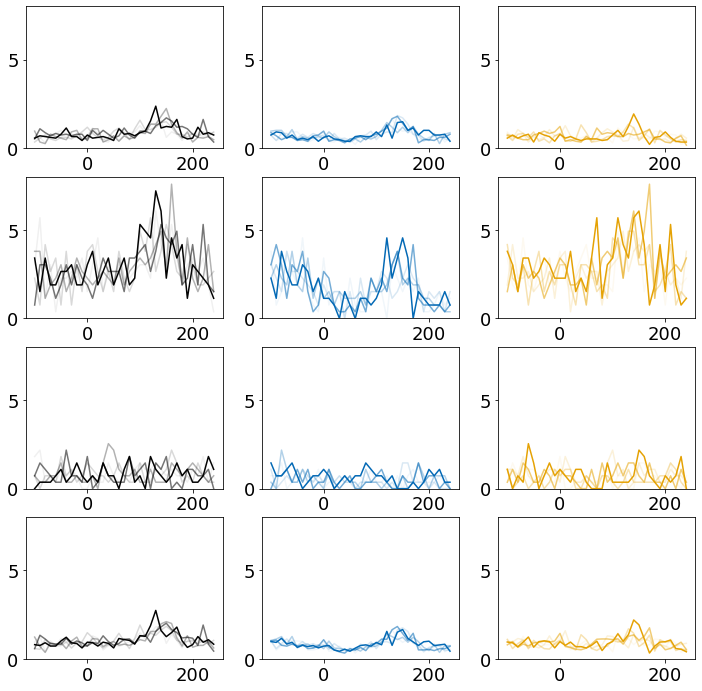

In [30]:
tmin = 800*2+50
# tmin = 200
tlen = 150+200
tmax = tmin + tlen
tbin = 10
dist_pos = [0.5,0.5]
fig, axes = plt.subplots(4,3,figsize = (12,12))

for cont in [0.02,0.05,0.1,0.18,0.33]:
# for cont in [0.18]:
    
    with open(f'data/{simname}/results_1/%s_%s_spikes.pickle'%(stim, cont),'rb') as f:
        all_spikes = pickle.load(f)
    with open(f'data/{simname}/results_1/%s_%s_positions.pickle'%(stim, cont),'rb') as f:
        all_positions = pickle.load(f)
        
    
    erates, bins = bin_fr(get_local_spikes(all_spikes[:8000], all_positions[:8000], center= dist_pos), tmin,tmax, tbin)
    pvrates, bins = bin_fr(get_local_spikes(all_spikes[8000:9000], all_positions[8000:9000], center= dist_pos), tmin,tmax, tbin)
    sstrates, bins = bin_fr(get_local_spikes(all_spikes[9000:], all_positions[9000:], center= dist_pos), tmin,tmax, tbin)

    poprates = 0.8*erates + 0.1*pvrates + 0.1*sstrates
    axes[3,0].plot(bins-tmin-100, poprates, alpha = cont*3, c  = 'black')
    
    axes[0,0].plot(bins-tmin-100, erates, alpha = cont*3, c  = 'black')
    axes[1,0].plot(bins-tmin-100, pvrates, alpha = cont*3, c  = 'black')
    axes[2,0].plot(bins-tmin-100, sstrates, alpha = cont*3, c  = 'black')
    print(cont, np.sum(poprates))
# ax.set_xlabel("t(ms)")

# simname = 'lb8_a0.02_pf0.6'
stim = 'PV'
ax=axes[1]
tmin = tmin + 800
tmax = tmin + tlen
for cont in [0.02,0.05,0.1,0.18,0.33]:
# for cont in [0.18]:
    with open(f'data/{simname}/results_1/%s_%s_spikes.pickle'%(stim, cont),'rb') as f:
        all_spikes = pickle.load(f)
    with open(f'data/{simname}/results_1/%s_%s_positions.pickle'%(stim, cont),'rb') as f:
        all_positions = pickle.load(f)
        
    
    erates, bins = bin_fr(get_local_spikes(all_spikes[:8000], all_positions[:8000], center= dist_pos), tmin,tmax, tbin)
    pvrates, bins = bin_fr(get_local_spikes(all_spikes[8000:9000], all_positions[8000:9000], center= dist_pos), tmin,tmax, tbin)
    sstrates, bins = bin_fr(get_local_spikes(all_spikes[9000:], all_positions[9000:], center= dist_pos), tmin,tmax, tbin)

    poprates = 0.8*erates + 0.1*pvrates + 0.1*sstrates
    axes[3,1].plot(bins-tmin-100, poprates, alpha = cont*3, c  = pvcolor)
    
    axes[0,1].plot(bins-tmin-100, erates, alpha = cont*3, c  = pvcolor)
    axes[1,1].plot(bins-tmin-100, pvrates, alpha = cont*3, c  = pvcolor)
    axes[2,1].plot(bins-tmin-100, sstrates, alpha = cont*3, c  = pvcolor)
    print(cont, np.sum(poprates))
# ax.set_xlabel("t(ms)")

stim = 'SOM'
ax=axes[2]
# tmin = tmin + 800
# tmax = tmin + tlen
for cont in [0.02,0.05,0.1,0.18,0.33]:
# for cont in [0.18]:
    with open(f'data/{simname}/results_1/%s_%s_spikes.pickle'%(stim, cont),'rb') as f:
        all_spikes = pickle.load(f)
    with open(f'data/{simname}/results_1/%s_%s_positions.pickle'%(stim, cont),'rb') as f:
        all_positions = pickle.load(f)
        
    
    erates, bins = bin_fr(get_local_spikes(all_spikes[:8000], all_positions[:8000], center= dist_pos), tmin,tmax, tbin)
    pvrates, bins = bin_fr(get_local_spikes(all_spikes[8000:9000], all_positions[8000:9000], center= dist_pos), tmin,tmax, tbin)
    sstrates, bins = bin_fr(get_local_spikes(all_spikes[9000:], all_positions[9000:], center= dist_pos), tmin,tmax, tbin)

    poprates = 0.8*erates + 0.1*pvrates + 0.1*sstrates
    axes[3,2].plot(bins-tmin-100, poprates, alpha = cont*3, c  = sstcolor)
    
    axes[0,2].plot(bins-tmin-100, erates, alpha = cont*3, c  = sstcolor)
    axes[1,2].plot(bins-tmin-100, pvrates, alpha = cont*3, c  = sstcolor)
    axes[2,2].plot(bins-tmin-100, sstrates, alpha = cont*3, c  = sstcolor)
    
    print(cont, np.sum(poprates))
# ax.set_xlabel("t(ms)")
for row in axes:
    for ax in row:
        ax.set_ylim(0,8)

# ax.set_ylim(-2,15)
# ax.set_ylabel('Exc neurons in\n visual area')

In [299]:
# simname = 'v3_12_ee0.02'
simname = 'v3_11c_ee0.02'
simname = 'v3_16'
stim = 'PV'
cont = 0.33
with open(f'data/{simname}/results_1/%s_%s_spikes.pickle'%(stim, cont),'rb') as f:
    all_spikes = pickle.load(f)
with open(f'data/{simname}/results_1/%s_%s_positions.pickle'%(stim, cont),'rb') as f:
    all_positions = pickle.load(f)

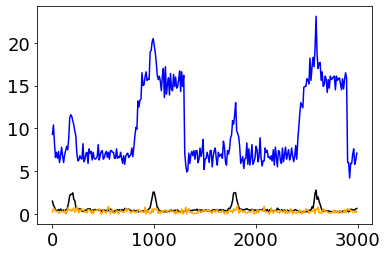

In [403]:


tmin = 0
tmax = 3000
erates, bins = bin_fr(all_spikes[:8000], tmin,tmax, 10)
pvrates, bins = bin_fr(all_spikes[8000:9000], tmin,tmax, 10)
sstrates, bins = bin_fr(all_spikes[9000:], tmin,tmax, 10)

plt.plot(bins, erates, c='black')
plt.plot(bins, pvrates, c='blue')
plt.plot(bins, sstrates, c='orange')
# plt. ylim(0,10)

(0.0, 600.0)

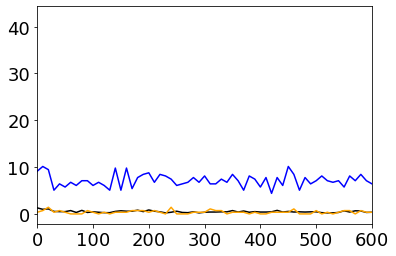

In [404]:
tmin = 0
tmax = 3000
erates, bins = bin_fr(get_local_spikes(all_spikes[:8000], all_positions[:8000], center= [0,0]), tmin,tmax, 10)
pvrates, bins = bin_fr(get_local_spikes(all_spikes[8000:9000], all_positions[8000:9000], center= [0,0]), tmin,tmax, 10)
sstrates, bins = bin_fr(get_local_spikes(all_spikes[9000:], all_positions[9000:], center= [0,0]), tmin,tmax, 10)

# erates, bins = bin_fr(all_spikes[:8000], tmin,tmax, 10)
# pvrates, bins = bin_fr(all_spikes[8000:9000], tmin,tmax, 10)
# sstrates, bins = bin_fr(all_spikes[9000:], tmin,tmax, 10)

plt.plot(bins, erates, c='black')
plt.plot(bins, pvrates, c='blue')
plt.plot(bins, sstrates, c='orange')
# plt. ylim(0,10)
plt.xlim(0,600)

(0.0, 2600.0)

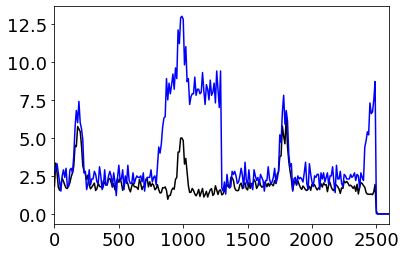

In [211]:
tmin = 0
tmax = 3000
# erates, bins = bin_fr(get_local_spikes(all_spikes[:8000], all_positions[:8000]), tmin,tmax, 10)
# pvrates, bins = bin_fr(get_local_spikes(all_spikes[8000:9000], all_positions[8000:9000]), tmin,tmax, 10)
# sstrates, bins = bin_fr(get_local_spikes(all_spikes[9000:], all_positions[9000:]), tmin,tmax, 10)

erates, bins = bin_fr(all_spikes[:8000], tmin,tmax, 10)
pvrates, bins = bin_fr(all_spikes[8000:9000], tmin,tmax, 10)
sstrates, bins = bin_fr(all_spikes[9000:], tmin,tmax, 10)

plt.plot(bins, erates, c='black')
plt.plot(bins, pvrates, c='blue')
# plt.plot(bins, sstrates, c='orange')
# plt. ylim(0,10)
plt.xlim(0,2600)

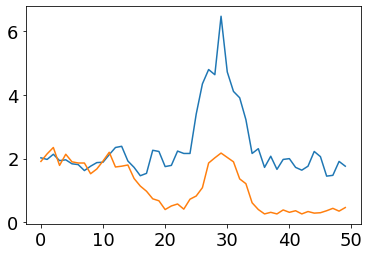

In [224]:
plt.plot( erates[150:200])
plt.plot( erates[ 70:120])
plt.show()

0 800
0 800


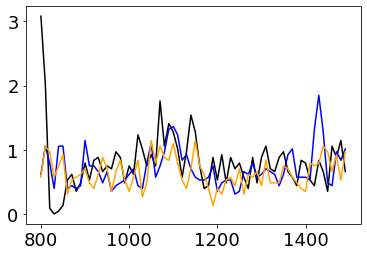

In [40]:
# simname = 'v3_11b_ee0.02'
# simname = 'v3_16c'
# simname = 'v3_14_ee0.02'
# simname = 'v2base'
stim = 'PV'
cont = 0.02
with open(f'data/{simname}/results_1/%s_%s_spikes.pickle'%(stim, cont),'rb') as f:
    all_spikes = pickle.load(f)
with open(f'data/{simname}/results_1/%s_%s_positions.pickle'%(stim, cont),'rb') as f:
    all_positions = pickle.load(f)

local_all = get_local_spikes(all_spikes[:8000], all_positions[:8000], radius=0.3)
t, ctrlfr, pvfr = get_averages(local_all, repeats = 1)

stim = 'SOM'
with open(f'data/{simname}/results_1/%s_%s_spikes.pickle'%(stim, cont),'rb') as f:
    all_spikes = pickle.load(f)
with open(f'data/{simname}/results_1/%s_%s_positions.pickle'%(stim, cont),'rb') as f:
    all_positions = pickle.load(f)
    
local_all = get_local_spikes(all_spikes[:8000], all_positions[:8000], radius=0.3)
t, ctrlfr, sstfr = get_averages(local_all, repeats = 1)

plt.plot(t, ctrlfr, c='black')
plt.plot(t, pvfr, c='blue')
plt.plot(t, sstfr, c='orange')

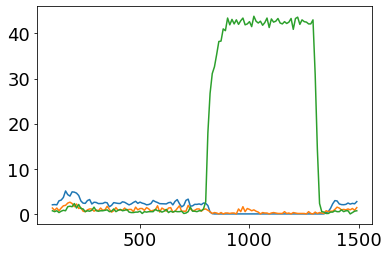

In [39]:
tmin = 100
tmax = 1500
erates, bins = bin_fr(all_spikes[:8000], tmin,tmax, 10)
pvrates, bins = bin_fr(all_spikes[8000:9000], tmin,tmax, 10)
sstrates, bins = bin_fr(all_spikes[9000:], tmin,tmax, 10)

plt.plot(bins, erates)
plt.plot(bins, pvrates)
plt.plot(bins, sstrates)

In [22]:
np.mean(rates)

20.61428571428572

In [29]:
dt = 5
alls = [t for event in all_spikes[8000:9000] for t in event]
hist, bins = np.histogram(alls, bins=np.arange(1000, 1700 + dt, dt))
hist2, bins2 = np.histogram(alls, bins=np.arange(2000, 2700 + dt, dt))

In [73]:
# def bin_fr(spikes, tmin, tmax, dt):
#     alls = [t for event in spikes for t in event]
#     hist, bins = np.histogram(alls, bins=np.arange(tmin, tmax + dt, dt))
#     return hist, bins

def bin_fr(spikes, tmin, tmax, dt):
    alls = [t for event in spikes for t in event]
    hist, bins = np.histogram(alls, bins=np.arange(tmin, tmax + dt, dt))
    rates = hist / dt / len(spikes) *1000
    return rates, bins[:-1]

def get_averages(spikes, tlen = 700, delay = 0, simtime = 800, repeats = 4, dt = 10):
    
    ctrl_times = []
    stim_times = []
    for repeat in range(repeats):
        ctrl_times.append(delay + simtime*repeat*2)
        stim_times.append(delay + simtime*(2*repeat+1))
        print(delay + simtime*repeat*2, delay + simtime*(2*repeat+1))
    hists_ctrl = []
    for tim in ctrl_times:
        hist,bins = bin_fr(spikes, tim, tim+tlen, dt)
        hists_ctrl.append(hist)
    hists_stim = []
    for tim in stim_times:
        hist,bins = bin_fr(spikes, tim, tim+tlen, dt)
        hists_stim.append(hist)
        
    return bins, np.mean(hists_ctrl, axis=0), np.mean(hists_stim, axis=0)

def get_local_spikes(spikes, positions, radius = 0.3, center = [0.5, 0.5]):
    center = np.array(center)
    selected=[]
    N= len(spikes)
    assert len(positions)==N
    for i in range(N):
        dist = periodic_distance(center,positions[i])
        if dist < radius:
            selected.append(spikes[i])
    return selected


In [225]:
def get_averages(spikes, tlen = 700, delay = 0, simtime = 800, repeats = 4, dt = 10):
    
    ctrl_times = []
    stim_times = []
    for repeat in range(repeats):
        ctrl_times.append(delay + simtime*repeat*2)
        stim_times.append(delay + simtime*(2*repeat+1))
        print(delay + simtime*repeat*2, delay + simtime*(2*repeat+1))
    hists_ctrl = []
    for tim in ctrl_times:
        hist,bins = bin_fr(spikes, tim, tim+tlen, dt)
        hists_ctrl.append(hist)
    hists_stim = []
    for tim in stim_times:
        hist,bins = bin_fr(spikes, tim, tim+tlen, dt)
        hists_stim.append(hist)
        
    return bins, np.mean(hists_ctrl, axis=0), np.mean(hists_stim, axis=0)

def get_local_spikes(spikes, positions, radius = 0.3, center = [0.5, 0.5]):
    center = np.array(center)
    selected=[]
    N= len(spikes)
    assert len(positions)==N
    for i in range(N):
        dist = periodic_distance(center,positions[i])
        if dist < radius:
            selected.append(spikes[i])
    return selected

In [32]:
simname = 'v3_4ns1.0e6.75'
# simname = 'v2base'
stim = 'PV'
cont = 0.18
with open(f'data/{simname}/results_1/%s_%s_spikes.pickle'%(stim, cont),'rb') as f:
    all_spikes = pickle.load(f)
with open(f'data/{simname}/results_1/%s_%s_positions.pickle'%(stim, cont),'rb') as f:
    all_positions = pickle.load(f)

local_all = get_local_spikes(all_spikes, all_positions)
t, ctrlfr, pvfr = get_averages(local_all)

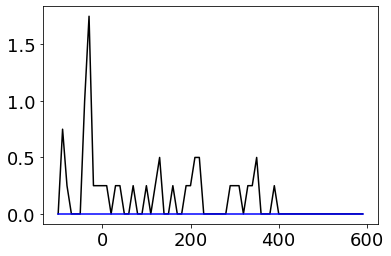

In [33]:
plt.plot(t-9100, ctrlfr, c='black')
plt.plot(t-9100, pvfr, c='blue')

0 1600


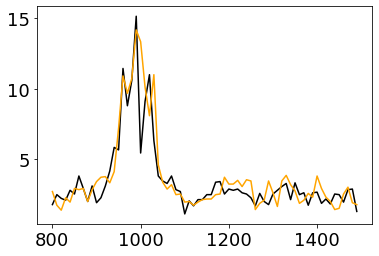

In [91]:
simname = 'lb8ns1.0e0.2'
simname = 'v3_9_ee0.025'
# simname = 'v2base'
stim = 'PV'
cont = 0.18
with open(f'data/{simname}/results_1/%s_%s_spikes.pickle'%(stim, cont),'rb') as f:
    all_spikes = pickle.load(f)
with open(f'data/{simname}/results_1/%s_%s_positions.pickle'%(stim, cont),'rb') as f:
    all_positions = pickle.load(f)

local_all = get_local_spikes(all_spikes[:8000], all_positions[:8000], radius = 0.3)
t, ctrlfr, sstfr = get_averages(local_all)
plt.plot(t, ctrlfr, c='black')
plt.plot(t, sstfr, c='orange')

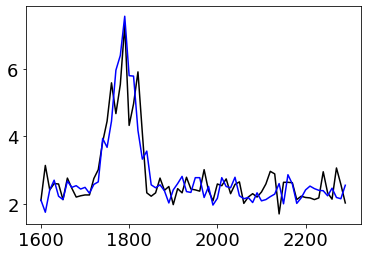

In [70]:
simname = 'lb8ns1.0e0.2'
simname = 'v3_9_ee0.025'
# simname = 'v2base'
stim = 'PV'
cont = 0.18
with open(f'data/{simname}/results_1/%s_%s_spikes.pickle'%(stim, cont),'rb') as f:
    all_spikes = pickle.load(f)
with open(f'data/{simname}/results_1/%s_%s_positions.pickle'%(stim, cont),'rb') as f:
    all_positions = pickle.load(f)

local_all = get_local_spikes(all_spikes[:8000], all_positions[:8000])
t, ctrlfr, sstfr = get_averages(local_all)
plt.plot(t, ctrlfr, c='black')
plt.plot(t, sstfr, c='blue')

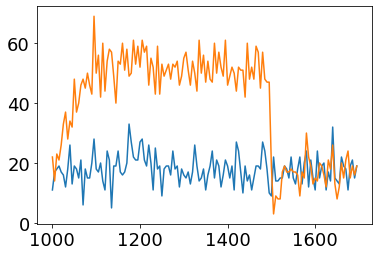

In [39]:
plt.plot(bins[:-1], hist2)
plt.plot(bins[:-1], hist)

In [25]:
simname = 'v2base'
N  = 0
tlen = 600
exc_ctrl, exc_stim, pv_ctrl, pv_stim, sst_ctrl, sst_stim = np.zeros([1000,tlen]), np.zeros([1000,tlen]), np.zeros([1000,tlen]), np.zeros([1000,tlen]), np.zeros([1000,tlen]), np.zeros([1000,tlen])
for seed in range(1,30):
    try:
        with open(f'data/{simname}/results_{seed}/PV_0.33_spikes.pickle','rb') as f:
            all_spikes = pickle.load(f)
        with open(f'data/{simname}/results_{seed}/PV_0.33_positions.pickle','rb') as f:
            all_positions = pickle.load(f)
    except FileNotFoundError:
        continue
    ec,es,pc,ps,sc,ss = get_stmap(all_spikes, all_positions)
    N += 1
    
    exc_ctrl += ec
    exc_stim += es
    pv_ctrl += pc 
    pv_stim += ps 
    sst_ctrl += sc 
    sst_stim += ss
    
    print(seed)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [26]:
data = [exc_ctrl, exc_stim, pv_ctrl, pv_stim, sst_ctrl, sst_stim ]
with open('v2base_st.pickle','wb') as f:
    pickle.dump(data,f)

In [26]:
simname = 'lb8_a0.02_pf0.6'
N  = 0
tlen = 600
exc_ctrl, exc_stim, pv_ctrl, pv_stim, sst_ctrl, sst_stim = np.zeros([1000,tlen]), np.zeros([1000,tlen]), np.zeros([1000,tlen]), np.zeros([1000,tlen]), np.zeros([1000,tlen]), np.zeros([1000,tlen])
for seed in range(1,11):
    try:
        with open(f'data/{simname}/results_{seed}/SOM_0.33_spikes.pickle','rb') as f:
            all_spikes = pickle.load(f)
        with open(f'data/{simname}/results_{seed}/SOM_0.33_positions.pickle','rb') as f:
            all_positions = pickle.load(f)
    except FileNotFoundError:
        continue
    ec,es,pc,ps,sc,ss = get_stmap(all_spikes, all_positions)
    N += 1
    
    exc_ctrl += ec
    exc_stim += es
    pv_ctrl += pc 
    pv_stim += ps 
    sst_ctrl += sc 
    sst_stim += ss
    
    print(seed)

IndexError: list index out of range

In [35]:
data = [exc_ctrl, exc_stim, pv_ctrl, pv_stim, sst_ctrl, sst_stim ]
with open('v2base_st2.pickle','wb') as f:
    pickle.dump(data,f)

In [39]:
with open('v2base_st.pickle','rb') as f:
    datapv = pickle.load(f)
    
with open('v2base_st2.pickle','rb') as f:
    datasst = pickle.load(f)

In [40]:
from scipy.ndimage import gaussian_filter

sigma_x, sigma_t = 5, 20
ecs = gaussian_filter(exc_ctrl, sigma=(sigma_x, sigma_t))
ess = gaussian_filter(exc_stim, sigma=(sigma_x, sigma_t))
pcs = gaussian_filter(pv_ctrl, sigma=(sigma_x, sigma_t))
pss = gaussian_filter(pv_stim, sigma=(sigma_x, sigma_t))
scs = gaussian_filter(sst_ctrl, sigma=(sigma_x, sigma_t))
sss = gaussian_filter(sst_stim, sigma=(sigma_x, sigma_t))

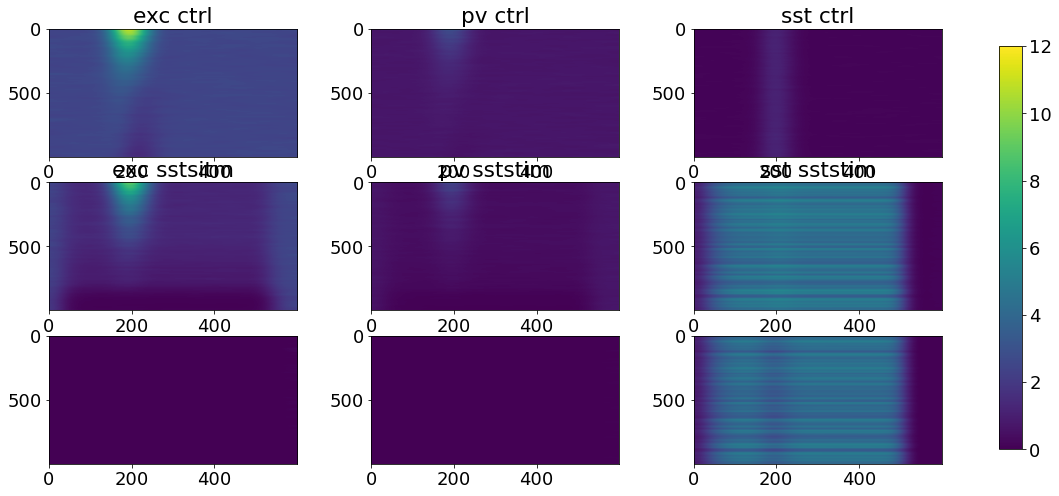

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# create a 1x3 subplot grid
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 8))

toplot = [[ecs,pcs,scs],[ess,pss,sss]]
titles = [['exc ctrl', 'pv ctrl', 'sst ctrl'], ['exc sstsitm', 'pv sststim', 'sst sststim']]

rows = [0,1]
cols = [0,1,2]
for ri in rows:
    for ci in cols:
        axs[ri,ci].imshow(toplot[ri][ci][:,:], cmap='viridis', aspect='auto', vmin=0, vmax = 12)
        axs[ri,ci].set_title(titles[ri][ci])
ri = 2
for ci in cols:
    axs[ri,ci].imshow(toplot[1][ci][:,:]-toplot[0][ci][:,:], cmap='viridis', aspect='auto', vmin=0, vmax = 12)
#     axs[ri,ci].set_title(titles[ri][ci])
#         axs[ri,ci].set_xrange(0,2000)


# adjust the spacing between the subplots and add a colorbar
plt.subplots_adjust(wspace=0.3)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(axs[0,0].images[0], cax=cbar_ax)



# display the plot
# plt.savefig()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create a 1x3 subplot grid
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

# plot the first array as a heatmap in the first subplot
axs[0].imshow(exc_ctrl, cmap='viridis', aspect='auto', vmax = 5)
axs[0].set_title('exc_ctrl')

# plot the second array as a heatmap in the second subplot
axs[1].imshow(pv_ctrl, cmap='viridis', aspect='auto', vmax = 5)
axs[1].set_title('pv_ctrl')

# plot the third array as a heatmap in the third subplot
axs[2].imshow(sst_ctrl, cmap='viridis', aspect='auto', vmax = 5)
axs[2].set_title('sst_ctrl')

# adjust the spacing between the subplots and add a colorbar
plt.subplots_adjust(wspace=0.3)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(axs[0].images[0], cax=cbar_ax)



# display the plot
plt.show()

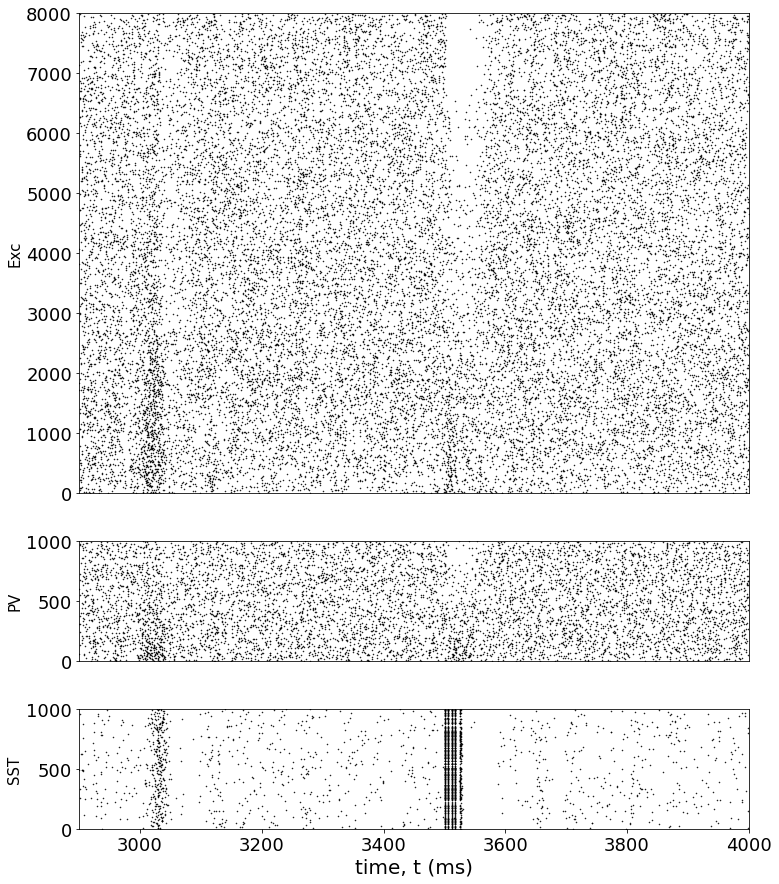

In [22]:
simname = 'v3_lb8_p%s'%0.3
with open(f'data/{simname}/results_1/SOM_0.33_spikes.pickle','rb') as f:
    all_spikes = pickle.load(f)
with open(f'data/{simname}/results_1/SOM_0.33_positions.pickle','rb') as f:
    all_positions = pickle.load(f)
plot_raster(all_spikes, all_positions, tmin = 2900, tmax = 4000)